In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123456)

import Corrfunc
from Corrfunc.theory.DDsmu import DDsmu
from Corrfunc.theory.xi import xi
from Corrfunc.utils import compute_amps
from Corrfunc.utils import evaluate_xi
from Corrfunc.utils import qq_analytic
from Corrfunc.bases import spline

In [2]:
def rand_set(n):
    x = boxsize * np.random.rand(n)
    y = boxsize * np.random.rand(n)
    z = boxsize * np.random.rand(n)
    rand_set = np.array([x,y,z]).T
    return(rand_set)

## parameters

In [3]:
boxsize = 20.0
bins=15
bin_edges = np.linspace(0.01,boxsize,bins+1)
    # starting bins at 0.01 instead of exactly 0 to avoid pair counting problems later on (to match Kate's Corrfunc)

### Set 1 ("DD")

In [4]:
set1 = []
set1 = rand_set(50)
set1

array([[ 2.53939666,  1.99473525, 19.86247966],
       [19.33435677, 14.69192444,  0.61880058],
       [ 5.20952012,  0.3308902 ,  7.13000205],
       [17.94473049,  9.62769001,  4.94689902],
       [ 7.53499432,  1.91877748,  3.75836242],
       [ 6.72443489,  9.94612665,  2.26472377],
       [ 9.02752941, 16.77592547, 13.79361127],
       [16.80510167, 17.94666515, 17.7238314 ],
       [ 2.46204289, 14.65183039,  5.58448978],
       [10.86052404, 15.17448728, 13.81657243],
       [ 7.4602445 , 11.21314366, 12.12083625],
       [ 8.95993649,  9.42955855,  1.21948467],
       [ 2.58881359,  2.77536236,  3.37186709],
       [17.19757413,  1.88922267, 18.26635961],
       [16.40776726, 18.84512677, 15.31897736],
       [ 7.04107078,  2.68198479,  4.33607809],
       [ 4.57774609, 12.61399105, 18.72832415],
       [15.53567501, 12.79136435, 13.81856446],
       [11.89567179,  8.66979571, 18.64286072],
       [ 2.75107113,  3.11694121,  5.55998212],
       [17.05799562, 17.25217966,  0.454

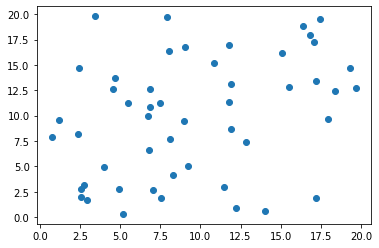

In [5]:
plt.scatter(set1[:,0],set1[:,1])

In [6]:
distances1=[]
for i in set1:
    for j in set1:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        distances1.append(d)
        #plt.plot([i[0],j[0]],[i[1],j[1]])
            #plotting was helpful for small 2D data sets, but not anymoreee

In [7]:
len(distances1)

2500

In [8]:
#unique_dist1 = list(set(distances1))
#print(len(unique_dist1))
#unique_dist1

#### Binning distances DD

In [9]:
print(boxsize, bins+1)
bin_edges

20.0 16


array([1.00000000e-02, 1.34266667e+00, 2.67533333e+00, 4.00800000e+00,
       5.34066667e+00, 6.67333333e+00, 8.00600000e+00, 9.33866667e+00,
       1.06713333e+01, 1.20040000e+01, 1.33366667e+01, 1.46693333e+01,
       1.60020000e+01, 1.73346667e+01, 1.86673333e+01, 2.00000000e+01])

array([  6.,  18.,  40.,  86., 118., 178., 166., 222., 210., 276., 216.,
       202., 208., 168., 112.])

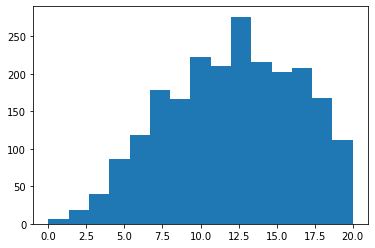

In [10]:
DD, bins1, _ = plt.hist(distances1, bins=bin_edges)
DD

### Set 2 (RR)

In [11]:
set2 = []
set2 = rand_set(80)
set2

array([[19.45282215,  0.21385999,  0.70442336],
       [14.52518608,  9.49042099, 10.87888597],
       [ 8.25301468,  5.1829122 , 10.15833366],
       [19.80006113, 12.14470861,  9.36049637],
       [10.71320466,  6.34184364, 19.47122413],
       [11.185058  ,  5.32926018, 14.54741129],
       [17.34039441, 14.24788031, 14.00972338],
       [ 0.38551457,  8.17323724, 10.30782405],
       [ 2.46193008, 14.11619816,  6.75421482],
       [16.16600192, 18.39999777,  2.15259889],
       [10.958777  , 14.81967249, 13.95758878],
       [ 8.00406061,  2.18314337, 10.83740308],
       [11.50703392,  9.13343135,  0.87173779],
       [16.37383703,  8.25054448,  1.49258841],
       [13.40069202,  9.11988832, 14.34038825],
       [ 2.80348325,  4.73015303, 13.23703278],
       [ 9.8134197 , 15.39388873, 10.493652  ],
       [ 2.40496361, 10.99795303,  8.9250699 ],
       [10.74040806, 10.61320936,  1.32604121],
       [ 2.21935715,  1.87651664, 14.8951344 ],
       [13.16430667,  0.45848827,  7.223

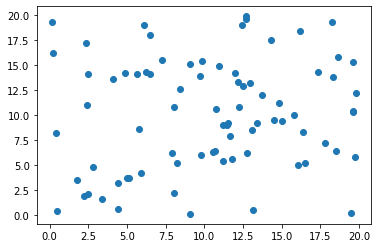

In [12]:
plt.scatter(set2[:,0],set2[:,1])

In [13]:
distances2=[]
for i in set2:
    for j in set2:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        distances2.append(d)
        #plt.plot([i[0],j[0]],[i[1],j[1]])

In [14]:
#unique_dist2 = list(set(distances2))
#print(len(unique_dist2))
#unique_dist2

array([  2.,  52., 150., 220., 302., 388., 544., 622., 612., 694., 648.,
       522., 442., 362., 290.])

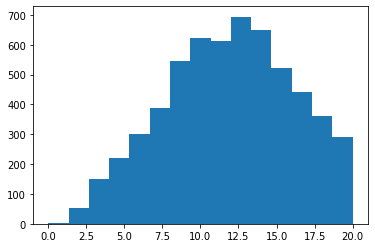

In [15]:
RR, bins2, _ = plt.hist(distances2, bins=bin_edges)
RR

## DR

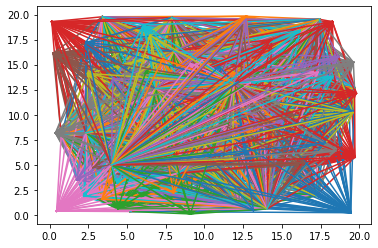

In [16]:
distances_dr=[]
for i in set1:
    for j in set2:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        distances_dr.append(d)
        #plt.plot([i[0],j[0]],[i[1],j[1]])

In [17]:
#unique_dist_dr = list(set(distances_dr))
#print(len(unique_dist_dr))

array([  5.,  43.,  76., 124., 176., 271., 352., 373., 391., 414., 382.,
       340., 285., 250., 185.])

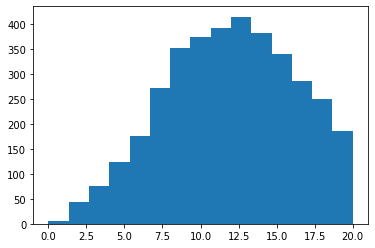

In [18]:
DR, bins_dr, _ = plt.hist(distances_dr, bins=bin_edges)
DR

## Calculating correlation function: Peebles & Hauser

In [19]:
# more parameters: used for all correlation function calculations below!
nd = len(set1)
nr = len(set2)
nd, nr

(50, 80)

In [20]:
DD_norm = DD/(nd*nd)
RR_norm = RR/(nr*nr)
DR_norm = DR/(nd*nr)
DD_norm, RR_norm, DR_norm

(array([0.0024, 0.0072, 0.016 , 0.0344, 0.0472, 0.0712, 0.0664, 0.0888,
        0.084 , 0.1104, 0.0864, 0.0808, 0.0832, 0.0672, 0.0448]),
 array([0.0003125, 0.008125 , 0.0234375, 0.034375 , 0.0471875, 0.060625 ,
        0.085    , 0.0971875, 0.095625 , 0.1084375, 0.10125  , 0.0815625,
        0.0690625, 0.0565625, 0.0453125]),
 array([0.00125, 0.01075, 0.019  , 0.031  , 0.044  , 0.06775, 0.088  ,
        0.09325, 0.09775, 0.1035 , 0.0955 , 0.085  , 0.07125, 0.0625 ,
        0.04625]))

In [21]:
xi_ls_man = (DD_norm-2*DR_norm+RR_norm)/RR_norm

In [22]:
print(xi_ls_man)
print(len(xi_ls_man))

[ 0.68       -0.76        0.06133333  0.19709091  0.13536424 -0.06061856
 -0.28941176 -0.00527331 -0.16601307  0.10916427 -0.03308642 -0.09363985
  0.14135747 -0.02187845 -0.05268966]
15


In [23]:
bins_avg=[]
for i in range(len(bin_edges)-1):
    avg = (bin_edges[i+1]+bin_edges[i])/2
    bins_avg.append(avg)
bins_avg

[0.6763333333333333,
 2.009,
 3.341666666666667,
 4.674333333333333,
 6.007,
 7.339666666666666,
 8.672333333333334,
 10.004999999999999,
 11.337666666666667,
 12.670333333333332,
 14.003,
 15.335666666666668,
 16.668333333333337,
 18.001,
 19.333666666666666]

Text(0.5, 1.0, '"Manual" $\\xi(r)$')

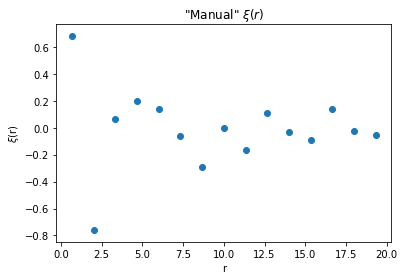

In [24]:
plt.scatter(bins_avg,xi_ls_man)
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')
plt.title(r'"Manual" $\xi(r)$')

In [25]:
len(bin_edges)-1

15

## Comparing with Corrfunc values

### Corrfunc results (using Landy-Szalay)

In [26]:
# more parameters! this cell is needed for all Corrfunc functions! / not just Landy-Szalay
x, y, z = set1[:,0], set1[:,1], set1[:,2]
x_rand, y_rand, z_rand = set2[:,0], set2[:,1], set2[:,2]

rmin = 0.0
rmax = 20.0 # to match boxsize
nbins = len(bin_edges)-1
r_avg = 0.5*(bin_edges[1:]+bin_edges[:-1])
r_fine = np.linspace(min(bin_edges), max(bin_edges), 1000)

periodic = False # because this data set does not wrap around values across the volume
nthreads = 1
bin_edges = bin_edges
nthreads, bin_edges, x, y, z, boxsize, periodic

(1, array([1.00000000e-02, 1.34266667e+00, 2.67533333e+00, 4.00800000e+00,
        5.34066667e+00, 6.67333333e+00, 8.00600000e+00, 9.33866667e+00,
        1.06713333e+01, 1.20040000e+01, 1.33366667e+01, 1.46693333e+01,
        1.60020000e+01, 1.73346667e+01, 1.86673333e+01, 2.00000000e+01]), array([ 2.53939666, 19.33435677,  5.20952012, 17.94473049,  7.53499432,
         6.72443489,  9.02752941, 16.80510167,  2.46204289, 10.86052404,
         7.4602445 ,  8.95993649,  2.58881359, 17.19757413, 16.40776726,
         7.04107078,  4.57774609, 15.53567501, 11.89567179,  2.75107113,
        17.05799562,  4.71014957,  2.92454465, 11.79737546, 11.4802355 ,
         1.22539925, 11.80852007,  4.90699638,  6.80889875, 19.69457479,
        18.3908081 ,  0.75543375, 17.23098579, 15.07137691,  8.1035751 ,
         6.87051751,  3.41834344,  7.8931802 , 12.83332341,  5.49184861,
         9.24708669, 17.42743307,  8.02262444, 12.2117654 ,  2.35934259,
        14.04368722,  8.28067329,  6.84690426, 11.9

In [27]:
# # tester/comparison cell to debug
# import numpy as np
# from Corrfunc.theory.DD import DD

# L = 20.0
# N = 50
# x = np.random.rand(N)*float(L)
# y = np.random.rand(N)*float(L)
# z = np.random.rand(N)*float(L)
# print(x.shape, y.shape, z.shape)
# print(max(x),max(y),max(z))

# binwidth = 1.0
# rmin = 1.0
# rmax = 8.0

# nthreads = 1
# periodic = False

# dd_res = DD(1, nthreads, bin_edges, x, y, z, periodic=periodic)
# print(dd_res)

In [28]:
dd_res = Corrfunc.theory.DD(1, nthreads, bin_edges, x, y, z, boxsize=boxsize, periodic=periodic)
dr_res = Corrfunc.theory.DD(0, nthreads, bin_edges, x, y, z, X2=x_rand, Y2=y_rand, Z2=z_rand, boxsize=boxsize, periodic=periodic)
rr_res = Corrfunc.theory.DD(1, nthreads, bin_edges, x_rand, y_rand, z_rand, boxsize=boxsize, periodic=periodic)

In [29]:
def landy_szalay(nd, nr, dd, dr, rr):
    dd = dd/(nd*nd)
    dr = dr/(nd*nr)
    rr = rr/(nr*nr)
    xi_ls = (dd-2*dr+rr)/rr
    return xi_ls

In [30]:
dd = np.array([x['npairs'] for x in dd_res], dtype=float)
dr = np.array([x['npairs'] for x in dr_res], dtype=float)
rr = np.array([x['npairs'] for x in rr_res], dtype=float)
xi_ls = landy_szalay(nd, nr, dd, dr, rr)
dd_norm = dd/(nd*nd)
rr_norm = rr/(nr*nr)
dr_norm = dr/(nd*nr)

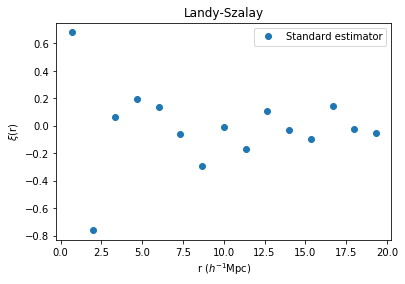

In [31]:
plt.plot(r_avg, xi_ls,'o',label='Standard estimator')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.title('Landy-Szalay')
plt.legend()

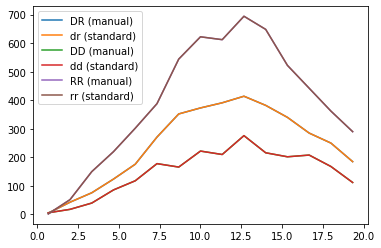

In [32]:
plt.plot(r_avg,DR,label="DR (manual)")
plt.plot(r_avg,dr,label="dr (standard)")
plt.plot(r_avg,DD,label="DD (manual)")
plt.plot(r_avg,dd,label="dd (standard)")
plt.plot(r_avg,RR,label="RR (manual)")
plt.plot(r_avg,rr,label="rr (standard)")
plt.legend()

### tophat basis

In [33]:
proj_type = 'tophat'
nprojbins = nbins

In [34]:
nmubins = 1
mumax = 1.0

In [35]:
dd_res, dd_proj, _ = DDsmu(1, nthreads, bin_edges, mumax, nmubins, x, y, z,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [36]:
dr_res, dr_proj, _ = DDsmu(0, nthreads, bin_edges, mumax, nmubins, x, y, z, X2=x_rand, Y2=y_rand, Z2=z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [37]:
rr_res, rr_proj, qq_proj = DDsmu(1, nthreads, bin_edges, mumax, nmubins, x_rand, y_rand, z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)
dd_proj, rr_proj, qq_proj

(array([  6.,  18.,  40.,  86., 118., 178., 166., 222., 210., 276., 216.,
        202., 208., 168., 112.]),
 array([  2.,  52., 150., 220., 302., 388., 544., 622., 612., 694., 648.,
        522., 442., 362., 290.]),
 array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  52.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 220.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 302.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 388.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 544.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 622.,   0.,   0.,   0., 

In [38]:
amps = compute_amps(nprojbins, nd, nd, nr, nr, dd_proj, dr_proj, dr_proj, rr_proj, qq_proj)
#numerator = dd_proj - rr_proj
#amps = np.linalg.solve(qq_proj, numerator)

Computing amplitudes (Corrfunc/utils.py)


In [39]:
xi_proj = evaluate_xi(amps, r_fine, proj_type, rbins=bin_edges)
dd_proj, dd

Evaluating xi (Corrfunc/utils.py)


(array([  6.,  18.,  40.,  86., 118., 178., 166., 222., 210., 276., 216.,
        202., 208., 168., 112.]),
 array([  6.,  18.,  40.,  86., 118., 178., 166., 222., 210., 276., 216.,
        202., 208., 168., 112.]))

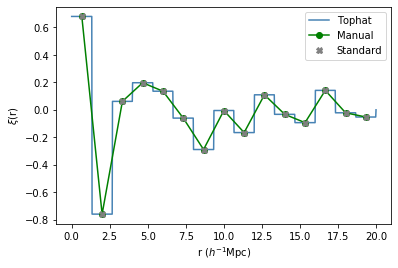

In [40]:
plt.plot(r_fine, xi_proj, color='steelblue', label='Tophat')
plt.plot(bins_avg, xi_ls_man, '-go', label='Manual')
plt.plot(r_avg, xi_ls, marker='X', ls='None', color='grey', label='Standard')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.legend()

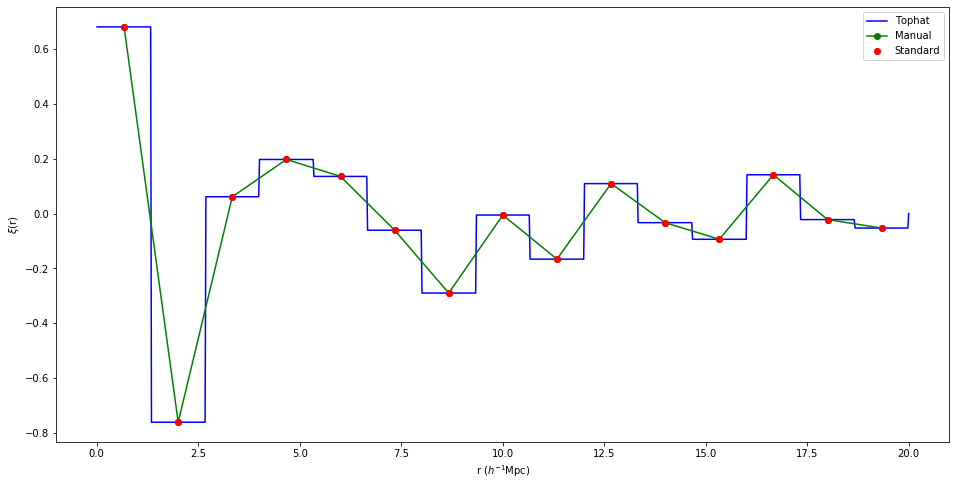

In [49]:
# comparing all results!
plt.figure(figsize=(16,8))
plt.plot(r_fine, xi_proj, color='blue', label='Tophat')
plt.plot(bins_avg, xi_ls_man, '-go', label='Manual')
plt.plot(r_avg, xi_ls, marker='o', ls='None', color='red', label='Standard')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.legend()